<a href="https://colab.research.google.com/github/Isabela192/Playing-with-data/blob/master/Sklearn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# I'm following this tutorial: https://www.dataquest.io/blog/sci-kit-learn-tutorial/
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='darkgrid', color_codes='True', rc={'figure.figsize':(11.7,8.27)})
pd.__version__

'0.25.3'

In [0]:
Watson_data='https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv'
sales_data=pd.read_csv(Watson_data) 
sales_data.head(n=11)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


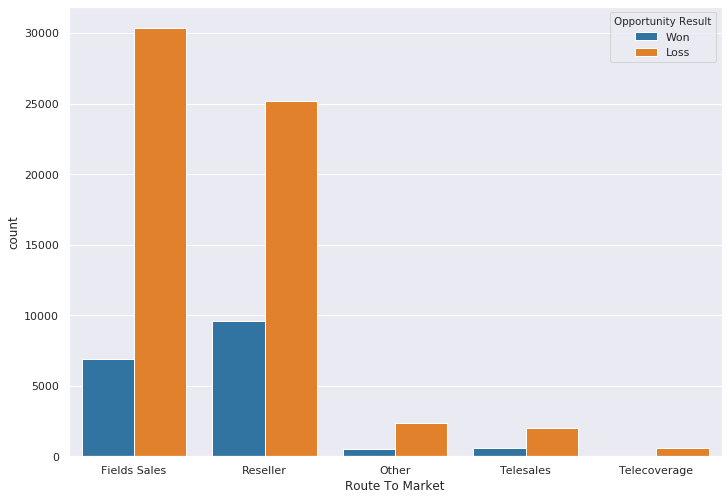

In [0]:
sns.countplot('Route To Market', data=sales_data, hue='Opportunity Result', palette='tab10')

In [0]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Opportunity Number                         78025 non-null int64
Supplies Subgroup                          78025 non-null object
Supplies Group                             78025 non-null object
Region                                     78025 non-null object
Route To Market                            78025 non-null object
Elapsed Days In Sales Stage                78025 non-null int64
Opportunity Result                         78025 non-null object
Sales Stage Change Count                   78025 non-null int64
Total Days Identified Through Closing      78025 non-null int64
Total Days Identified Through Qualified    78025 non-null int64
Opportunity Amount USD                     78025 non-null int64
Client Size By Revenue                     78025 non-null int64
Client Size By Employee Count              78025 non-null int64
Revenue From Client Past Two Years         78025 non-n

In [0]:
# Scikit-learn imports
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
print("Supplies Subgroup: ", sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup:  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


In [0]:
# Sklearn only understands numbers
# So with the preprocessing function allow us 
# to convert the object types into int64
le = preprocessing.LabelEncoder()
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [0]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                            int64
Supplies Group                               int64
Region                                       int64
Route To Market                              int64
Elapsed Days In Sales Stage                  int64
Opportunity Result                           int64
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                              int64
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [0]:
# Let's start training our ML algorithm
# First: Divide the dataset. Why?
# We will use half to train the model and the other half to test it
cols = ['Supplies Subgroup', 'Supplies Group', 'Region',
       'Route To Market', 'Elapsed Days In Sales Stage', 
       'Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Ratio Days Identified To Total Days',
       'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days', 'Deal Size Category']
sub_set = sales_data[cols]
target = sales_data['Opportunity Result']
sub_set.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


### Spliting you data
https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
To split the test data we will use the train_test_split() function from sklearn
The passing arguments are: 
- **test_size (float/int):** where you set the size of the training data 
- **train_size (float/int):** only specify it if you don use the test_size option
- **random_state:** sets the seed for the random number generation during the split.

A usal proportion to split the data is a 80-20% ratio for data science
                            

In [0]:
data_train, data_test, target_train, target_test = train_test_split(sub_set, target, test_size=0.3, random_state=10)

### Choosing he right ML to suit your need
We can use the cheat sheet provided by sklearn.

Using the image bellow we an fit our data into one path of the many ML models avaliable.
![alt text](https://scikit-learn.org/stable/_static/ml_map.png)

So, by following the arrows we can see that our data has more than 50 samples, we want to predict a category (if we wanted to predict the amount of money to be earnged by a bank, we eould go with predicting a quantity). We do have labeled data wich leads us to the pink bubble of Classification. From here we can follow 3 ways:
 - Naive Baues:
 - Lienar SVC: 
 - KNeighbors Cassifier:


In [0]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

pred = gnb.fit(data_train, target_train).predict(data_test)

print('Naive-Bayes Accuracy: ' ,accuracy_score(target_test, pred, normalize=True))

Naive-Bayes Accuracy:  0.7590567327409433


In [0]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(random_state=1)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.5089712918660287


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(data_train, target_train)

pred = neigh.predict(data_test)

print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


In [0]:
from yellowbrick.classifier import ClassificationReport